# Connecting to drive
 we are connecting to google drive where our dataset of audio files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# setup root folder
we are making our dataset folder as a root directry

In [ ]:
# import os
# Root = "/content/drive/MyDrive/speech-emotion-recognition-data"
# os.chdir(Root)

In [ ]:
# ls

# importing all packages

In [ ]:
import librosa
import soundfile
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt
import os, glob, pickle
from IPython.display import Audio
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

# Extract function

this is function we use to extract all the features from audio to analysis all the audio files and converting the audio into np array, because we know that ML alogrithms only work with numeric data not with textual or any other,

In [ ]:
#Extract features (mfcc, chroma, mel) from a sound file
def extract_feature(file_name, mfcc, chroma, mel):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate = sound_file.samplerate
        if chroma:
            stft=np.abs(librosa.stft(X))
        result=np.array([])
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
    return result

# Emotion data set
   we have 8 emotion types of data but we are using only 4 to observe



In [ ]:
# Emotions in the  dataset RAVDEE)
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['neutral', 'happy', 'fearful', 'disgust', "sad", 'angry']

In [ ]:
# Empotion in the dataset 

# function loading data set
loading all the audio files from the drive and etxtracting the features and splitting the data into train and test part for machine learning model. 

In [ ]:
# #Load the data and extract features for each sound file (RAVDEES DATA SET)
# def load_data(test_size=0.2):
#     x,y=[],[]
#     for file in glob.glob("/content/drive/MyDrive/speech-emotion-recognition-data/Actor_*/*.wav"):
#         file_name=os.path.basename(file)
#         emotion=emotions[file_name.split("-")[2]]
#         if emotion not in observed_emotions:
#             continue
#         feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
#         x.append(feature)
#         y.append(emotion)
#     return train_test_split(np.array(x), y, test_size=test_size, random_state=421)

In [ ]:
#  hybrid dataset
X,y = [],[]

In [ ]:
name = "OAF_back_fear.wav"
name.split("_")[2].split(".")[0]

'fear.wav'

In [ ]:
#Load the data and extract features for each sound file (RAVDEES DATA SET)
def load_data():
    for file in glob.glob("/content/drive/MyDrive/speech-emotion-recognition-data/Actor_*/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        X.append(feature)
        y.append(emotion)


In [ ]:
load_data()

**Load dataset from tess**

In [ ]:
def load_data_TESS():
  for file in glob.glob("/content/drive/MyDrive/TESS/*/*.wav"):
    name_file = os.path.basename(file)
    emotion = name_file.split("_")[2].split(".")[0]
    if emotion not in observed_emotions:
      continue
    feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
    X.append(feature)
    y.append(emotion)

In [ ]:
load_data_TESS()

**Load Savee data set**

In [ ]:
# Emotions in the  dataset SAVEE)
emotions_savee = {
  'n':'neutral',
  'h':'happy',
  's':'sad',
  'a':'angry',
  'f':'fearful',
  'd':'disgust',
}


In [ ]:
#  load data set for savee

def load_data_SAVEE():
     for file in glob.glob("/content/drive/MyDrive/SAVEE/*.wav"):
       filename = os.path.basename(file)
       emotion = emotions_savee[filename.split("_")[1][:1]]
       if emotion not in observed_emotions:
            continue
       feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
       X.append(feature)
       y.append(emotion)
 

In [ ]:
load_data_SAVEE()

# **Analysis of datasets**

In [ ]:
df = pd.DataFrame(y)
df

,0
0,sad
1,sad
2,sad
3,sad
4,sad
...,...
2475,neutral
2476,sad
2477,neutral
2478,neutral


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


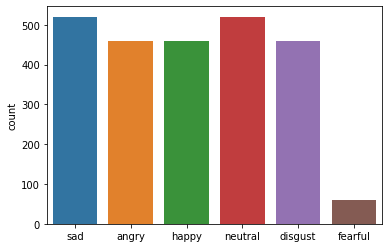

In [ ]:
sns.countplot(y)

**We can see here that how our dataset is distributed, which is good for predicting.**

In [ ]:
def create_waveplot(data, sr, e):
    plt.figure(figsize=(10, 3))
    plt.title('Waveplot for audio with {} emotion'.format(e), size=15)
    librosa.display.waveplot(data, sr=sr)
    plt.show()

def create_spectrogram(data, sr, e):
    # stft function converts the data into short term fourier transform
    X = librosa.stft(data)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(12, 3))
    plt.title('Spectrogram for audio with {} emotion'.format(e), size=15)
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')   
    #librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
    plt.colorbar()

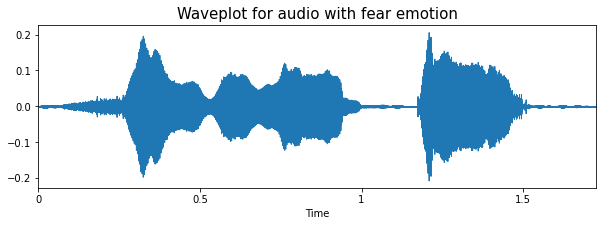

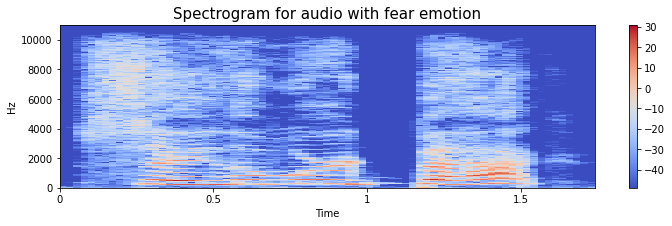

In [ ]:
# fear
emotion = 'fear'
path = "/content/drive/MyDrive/TESS/OAF_Fear/OAF_back_fear.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)



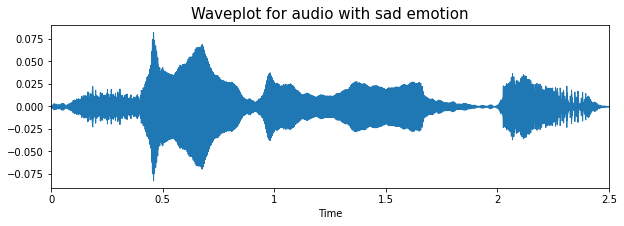

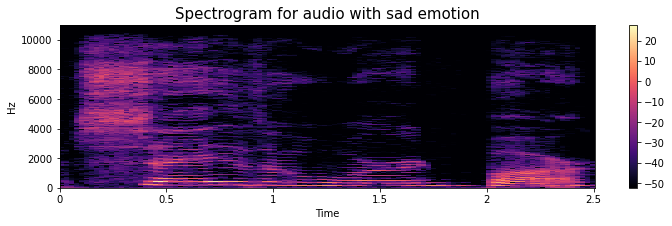

In [ ]:
# sad
emotion = 'sad'
path = "/content/drive/MyDrive/TESS/OAF_Sad/OAF_bar_sad.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)



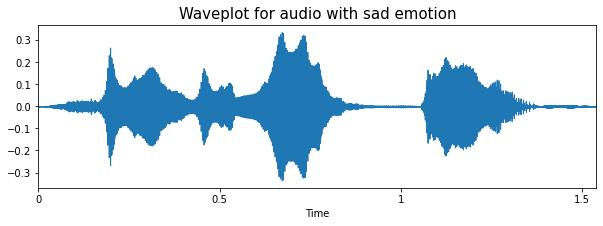

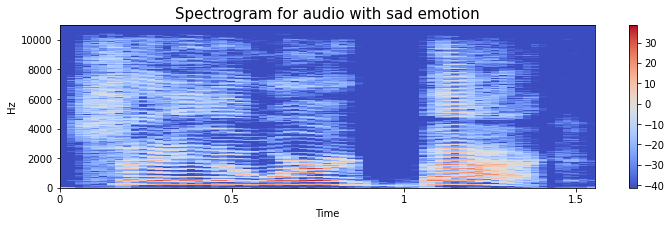

In [ ]:
# angry
emotion = 'sad'
path = "/content/drive/MyDrive/TESS/OAF_angry/OAF_back_angry.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


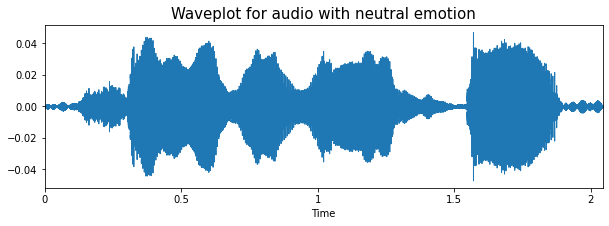

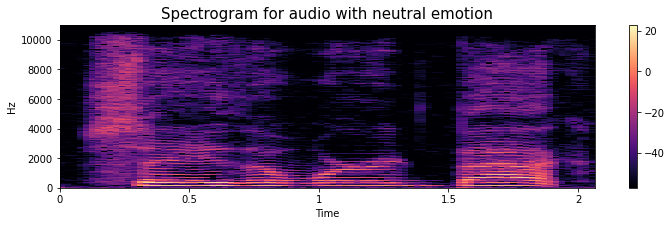

In [ ]:
# neutral
emotion = 'neutral'
path = "/content/drive/MyDrive/TESS/OAF_neutral/OAF_back_neutral.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


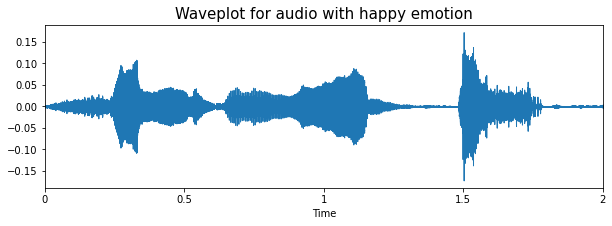

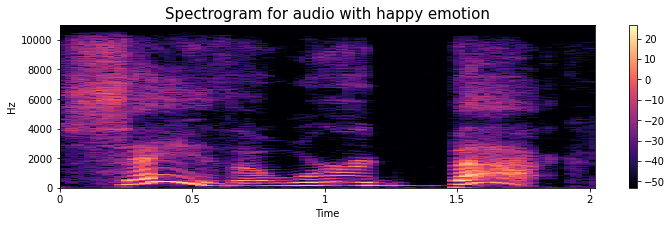

In [ ]:
# happy
emotion = 'happy'
path = "/content/drive/MyDrive/TESS/OAF_happy/OAF_back_happy.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


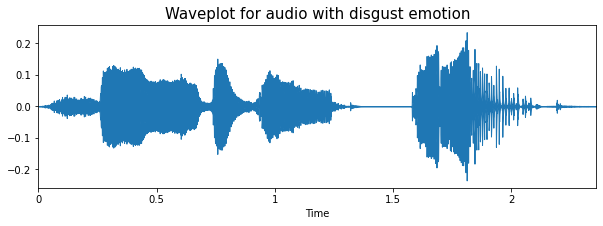

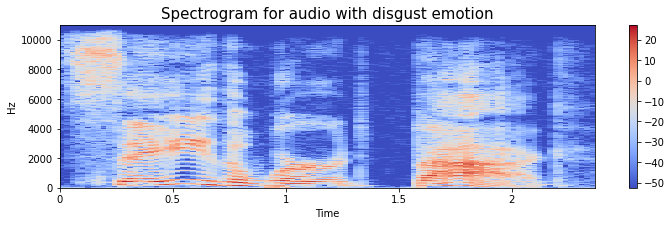

In [ ]:
# disgust
emotion = 'disgust'
path = "/content/drive/MyDrive/TESS/YAF_disgust/YAF_back_disgust.wav"
data, sampling_rate = librosa.load(path)
create_waveplot(data, sampling_rate, emotion)
create_spectrogram(data, sampling_rate, emotion)
Audio(path)


**Load CREMA-D dataset**

In [ ]:
# Emotions in the  dataset crema-d)
emotions_cremad = {
  'NEU':'neutral',
  'HAP':'happy',
  'SAD':'sad',
  'ANG':'angry',
  'FEA':'fearful',
  'DIS':'disgust',
}

In [ ]:
def load_data_CREMA_D():
    for file in glob.glob("/content/drive/MyDrive/CREMA-D/*.wav"):
      filename = os.path.basename(file)

      emotion = emotions_cremad[filename.split("_")[2]]
      # print(emotion)
      if emotion not in observed_emotions:
          continue
      feature=extract_feature(file, mfcc=True, chroma=True, mel=False)
      X.append(feature)
      y.append(emotion)

In [ ]:
load_data_CREMA_D()

In [ ]:
len(y)

2480

In [ ]:
len(X)

2480

# Calling the function to store data in varibales

In [ ]:
#Split the dataset
x_train,x_test,y_train,y_test = train_test_split(np.array(X),y, test_size=.3, random_state=30)

In [ ]:
x_train

array([[-2.84613708e+02,  4.76843872e+01, -1.19177170e+01, ...,
         3.93770374e-02,  3.78817245e-02,  3.74838896e-02],
       [-3.00576324e+02,  3.13010559e+01, -1.31568298e+01, ...,
         2.00933423e-02,  3.27367261e-02,  2.15579998e-02],
       [-3.77079956e+02,  4.61973267e+01, -1.36619616e+01, ...,
         8.68898816e-04,  8.68333504e-04,  8.48696625e-04],
       ...,
       [-5.27125854e+02,  9.03015213e+01,  3.47933502e+01, ...,
         1.76583781e-05,  2.26192533e-05,  2.97725783e-05],
       [-5.19512146e+02,  9.15038834e+01,  3.12558212e+01, ...,
         2.45558604e-05,  3.77448123e-05,  3.30132098e-05],
       [-4.60000671e+02,  6.53892212e+01,  1.79378452e+01, ...,
         2.75275786e-04,  2.76057370e-04,  2.74565129e-04]])

In [ ]:
#Get the shape of the training and testing datasets
print((x_train.shape[0], x_test.shape[0]))

(2139, 917)


In [ ]:
#Get the number of features extracted
print(f'Features extracted: {x_train.shape[1]}')

Features extracted: 180


# Creating Model
we are using Multi layer perception classifer to create our model

In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model = MLPClassifier(alpha=0.01, 
                      batch_size=256, 
                      epsilon=1e-08, 
                      hidden_layer_sizes=(300,), 
                      learning_rate='adaptive', 
                      max_iter=500)

# Training model
 we are training our model but still it is not that optimized,

In [ ]:
#Train the model 
# not optimized (60-66)%
model.fit(x_train,y_train)


MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:

y_pred = model.predict(x_test)
y_pred

array(['sad', 'neutral', 'neutral', 'angry', 'angry', 'happy', 'sad',
       'angry', 'disgust', 'happy', 'sad', 'disgust', 'fearful',
       'fearful', 'sad', 'neutral', 'angry', 'sad', 'neutral', 'sad',
       'sad', 'angry', 'sad', 'happy', 'happy', 'sad', 'sad', 'fearful',
       'disgust', 'happy', 'sad', 'angry', 'happy', 'fearful', 'disgust',
       'angry', 'neutral', 'neutral', 'neutral', 'disgust', 'angry',
       'sad', 'sad', 'neutral', 'happy', 'angry', 'happy', 'disgust',
       'sad', 'disgust', 'happy', 'sad', 'angry', 'disgust', 'happy',
       'happy', 'fearful', 'happy', 'angry', 'disgust', 'angry', 'sad',
       'happy', 'angry', 'sad', 'neutral', 'neutral', 'disgust',
       'disgust', 'sad', 'neutral', 'neutral', 'sad', 'sad', 'angry',
       'happy', 'disgust', 'happy', 'happy', 'disgust', 'happy', 'happy',
       'disgust', 'happy', 'fearful', 'angry', 'sad', 'disgust', 'happy',
       'disgust', 'happy', 'disgust', 'sad', 'disgust', 'disgust',
       'disgust',

# Optimizing our model
we are using hyper parameter to optimze our model

In [ ]:
# optimization parameter
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05, 0.1],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
# optimizing with GridSearchCV
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(model, parameter_space, n_jobs=-1, cv=3)
clf.fit(x_train,y_train)

GridSearchCV(cv=3,
             estimator=MLPClassifier(alpha=0.01, batch_size=256,
                                     hidden_layer_sizes=(300,),
                                     learning_rate='adaptive', max_iter=500),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05, 0.1],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:

# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# checcking result of optimzation
 
# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'solver': 'adam'}
0.615 (+/-0.063) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.789 (+/-0.038) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.538 (+/-0.255) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.795 (+/-0.020) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.551 (+/-0.115) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.802 (+/-0.043) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'ada

# Testinig our model
 we check how our model performed with testing dataset

In [ ]:
y_true, y_pred = y_test , clf.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
print('Results on the test set:')

print(classification_report(y_true, y_pred))

**Confusion matrix**


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[114   1   9   0   0   6]
 [  0 128   4   0   0   4]
 [  1   3   9  11   0   6]
 [  4   5   6 110   0   1]
 [  0  15   1   1 128  17]
 [  1   4  20   9   1 125]]


# Prediction testing

In [ ]:
#Predict for the test set
y_pred = model.predict(x_test)

In [ ]:
y_pred

# Checking predection score
 

In [ ]:
from sklearn.metrics import accuracy_score, f1_score 

In [ ]:
##Calculate the accuracy of our model
accuracy =accuracy_score(y_true=y_test, y_pred=y_pred)

#Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 86.48%


In [ ]:
f1_score(y_test, y_pred,average=None)

In [ ]:
import pandas as pd
df=pd.DataFrame({'Actual': y_test, 'Predicted':y_pred , 'Is_match': y_pred == y_test})
df.head(20)

In [ ]:
print(df["Is_match"].sum())
len(df) - df["Is_match"].sum()

# Exporting model 
we can export the model to use or integrate with web apps

In [ ]:
import pickle
# Writing different model files to file
with open( 'modelhybrid.sav', 'wb') as f:
    pickle.dump(model,f)



# Loading exported model
we can reuse the exported model, we don't need to run all codes again

In [ ]:
# filename = 'modelForPrediction.sav'
# loaded_model = pickle.load(open(filename, 'rb')) # loading the model file from the storage

# feature = extract_feature("/content/drive/MyDrive/speech-emotion-recognition-data/Actor_01/03-01-01-01-01-01-01.wav", 
#                           mfcc=True, 
#                           chroma=True, 
#                           mel=True)

# feature = feature.reshape(1,-1)

# prediction = loaded_model.predict(feature)
# prediction

In [ ]:
with open("modelhybridEmotion.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
with open("modelhybridEmotion.pkl", "rb") as f:
    model1 = pickle.load(f)

In [ ]:
val = extract_feature("/content/WhatsApp-Audio-2022-12-30-at-13.25.11.wav", mfcc=True,chroma=True, mel=True)
# print(val)

model1.predict(val.reshape(1,-1))

array(['disgust'], dtype='<U7')

In [ ]:
y_pred = model1.predict(x_test)